# Car Price Prediction

# IMPORT LIBRARIES

In [1]:
# python library
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
# ml libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# EXAMINE DATA

In [3]:
data = pd.read_csv("C:/Users/HAZAL/OneDrive/Masaüstü/Projeler/car_price_prediction/cars_data.csv")

In [4]:
data.head()

Make           Model   Type Origin DriveTrain     MSRP  EngineSize  \
0  Acura             MDX    SUV   Asia        All  $36,945         3.5   
1  Acura  RSX Type S 2dr  Sedan   Asia      Front  $23,820         2.0   
2  Acura         TSX 4dr  Sedan   Asia      Front  $26,990         2.4   
3  Acura          TL 4dr  Sedan   Asia      Front  $33,195         3.2   
4  Acura      3.5 RL 4dr  Sedan   Asia      Front  $43,755         3.5   

   Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  Wheelbase  Length  
0        6.0         265        17           23    4451        106     189  
1        4.0         200        24           31    2778        101     172  
2        4.0         200        22           29    3230        105     183  
3        6.0         270        20           28    3575        108     186  
4        6.0         225        18           24    3880        115     197

In [5]:
data.tail()

Make                    Model   Type  Origin DriveTrain     MSRP  \
423  Volvo  C70 LPT convertible 2dr  Sedan  Europe      Front  $40,565   
424  Volvo  C70 HPT convertible 2dr  Sedan  Europe      Front  $42,565   
425  Volvo               S80 T6 4dr  Sedan  Europe      Front  $45,210   
426  Volvo                      V40  Wagon  Europe      Front  $26,135   
427  Volvo                     XC70  Wagon  Europe        All  $35,145   

     EngineSize  Cylinders  Horsepower  MPG_City  MPG_Highway  Weight  \
423         2.4        5.0         197        21           28    3450   
424         2.3        5.0         242        20           26    3450   
425         2.9        6.0         268        19           26    3653   
426         1.9        4.0         170        22           29    2822   
427         2.5        5.0         208        20           27    3823   

     Wheelbase  Length  
423        105     186  
424        105     186  
425        110     190  
426        101     180  
427        109     186

In [6]:
data.shape

(428, 14)

# Finding missing values

In [7]:
data.isnull().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

In [8]:
data = data.dropna()

# Converting the dependent variable to numerical form

In [9]:
data.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [10]:
data['MSRP'].head(2)

0    $36,945
1    $23,820
Name: MSRP, dtype: object

In [11]:
data['MSRP'] = data['MSRP'].str.replace('$','')
data['MSRP'] = data['MSRP'].str.replace(',','')
data['MSRP'] = data['MSRP'].astype('int')

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_10604\526510373.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



# Visualize data to better understand the relationship between independent variables and dependent variables before building your model

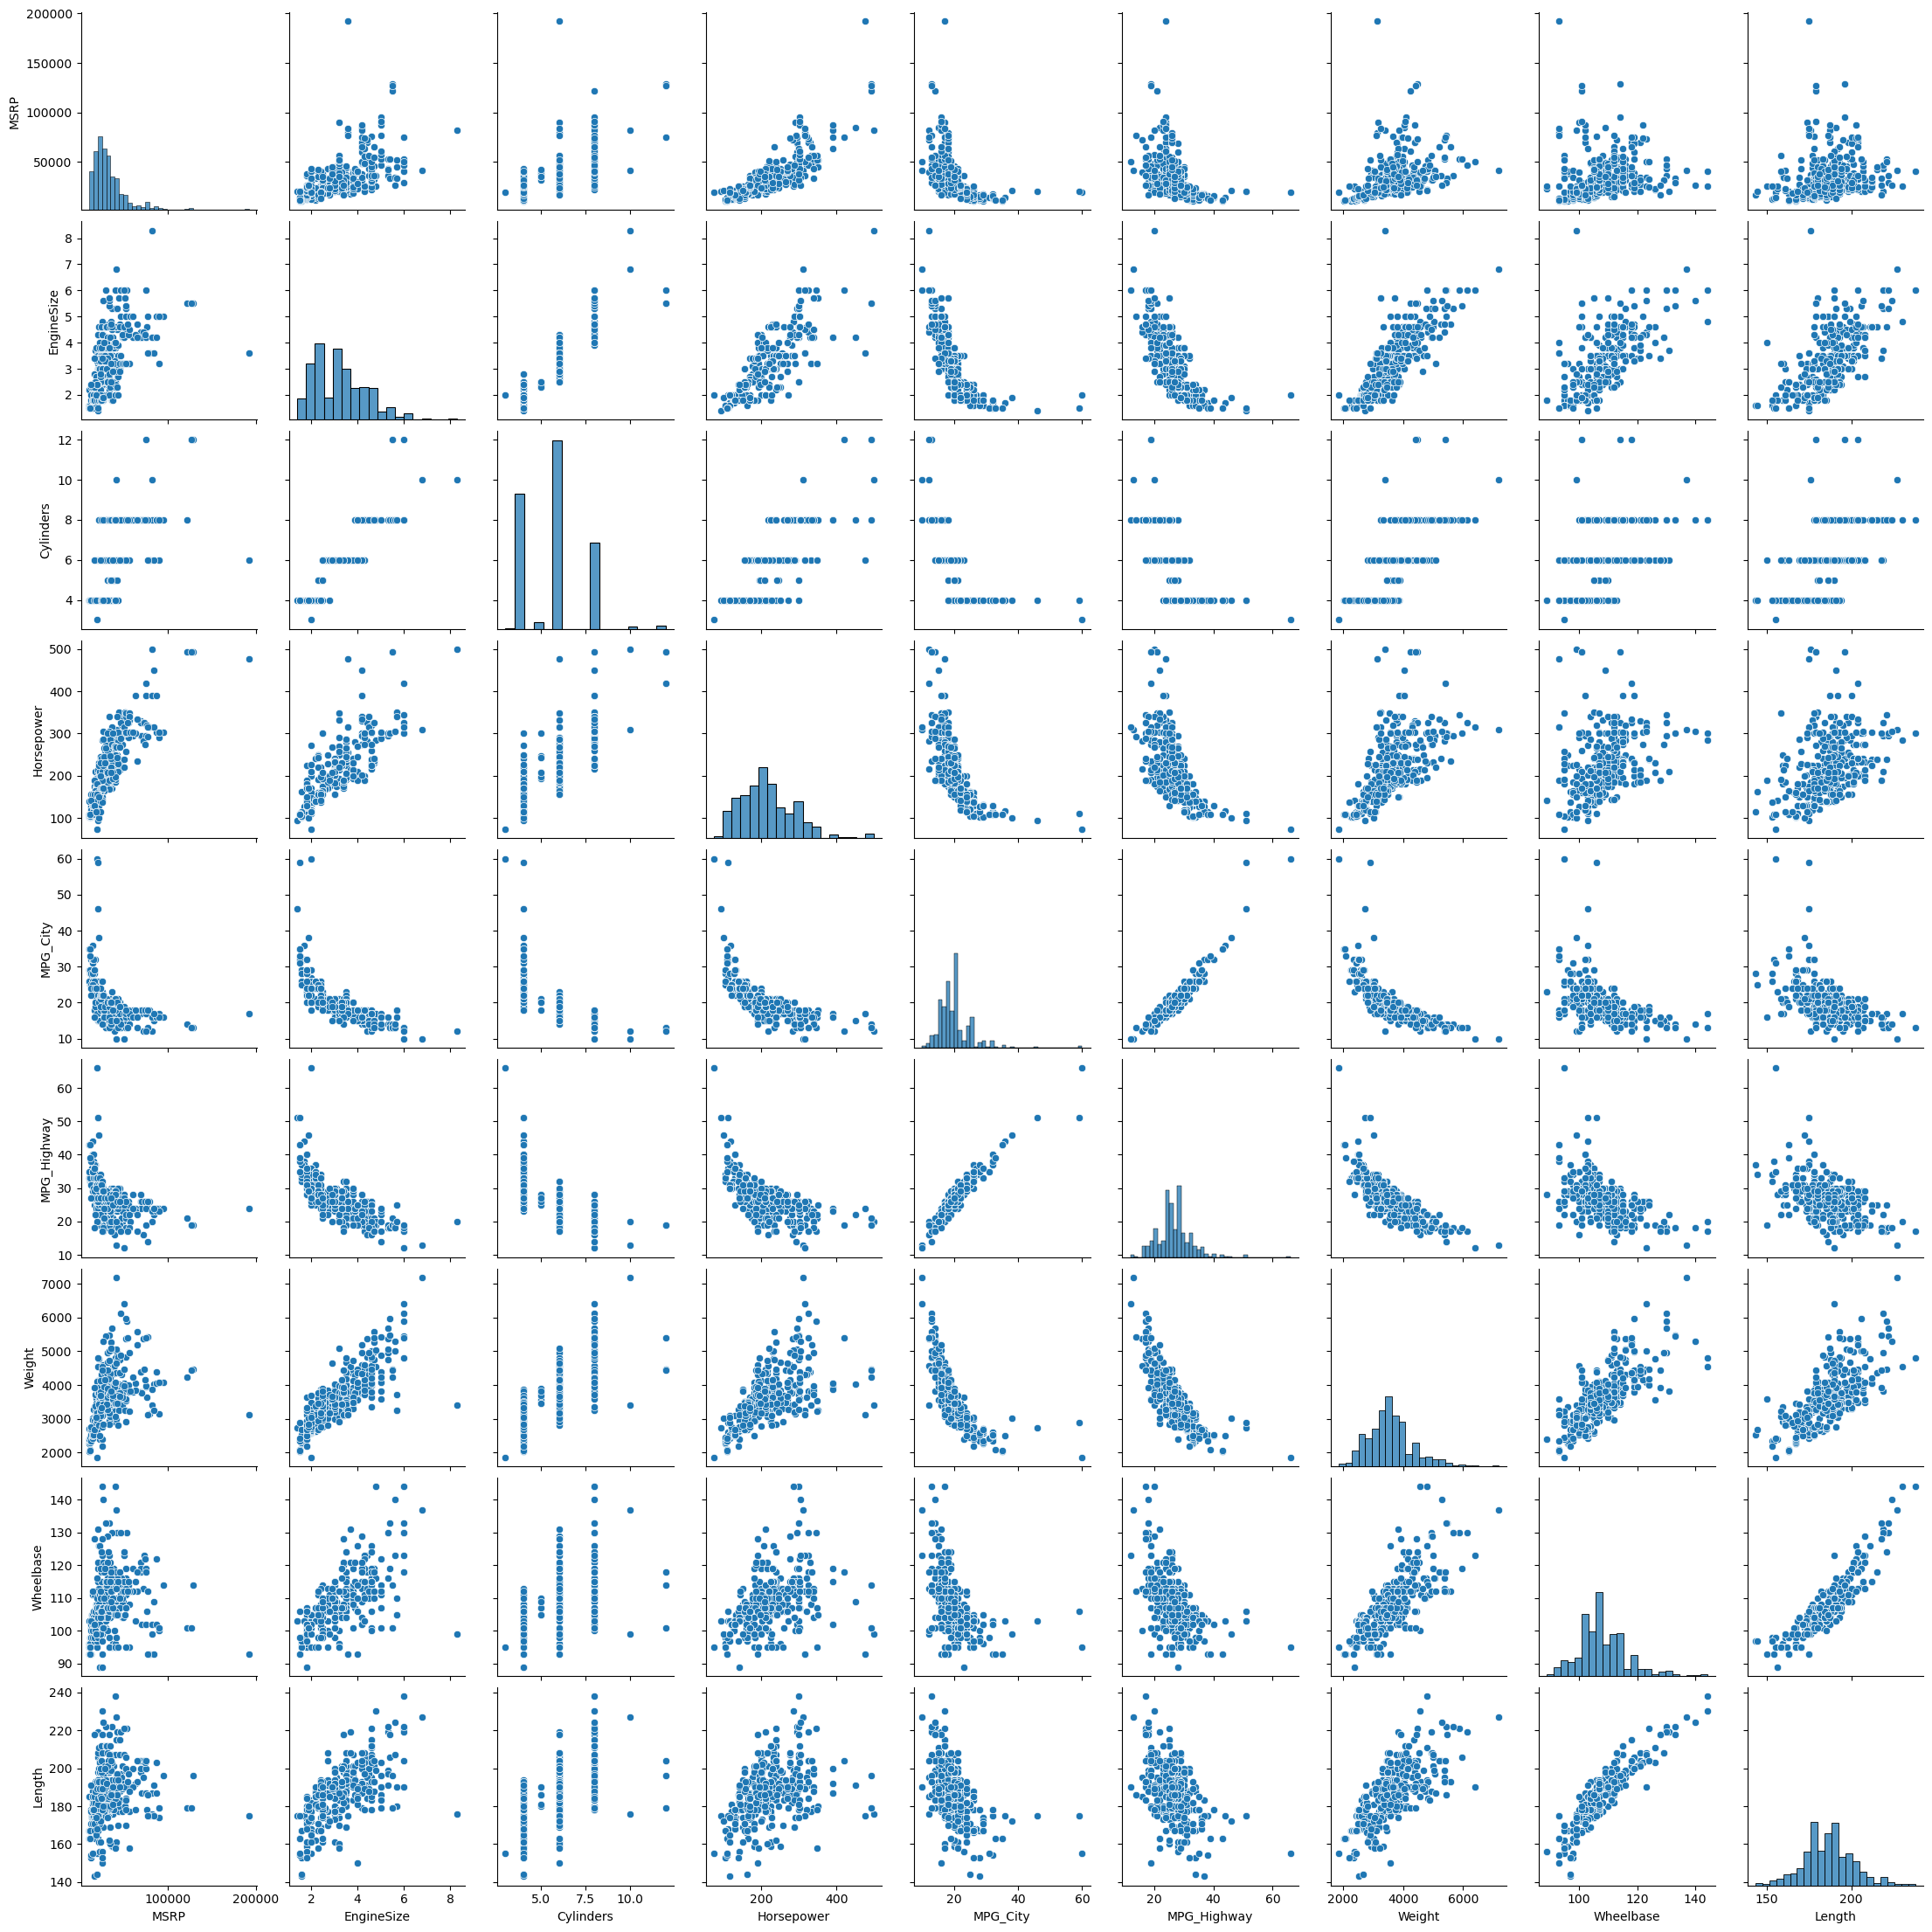

In [12]:
sns.pairplot(data)

In [13]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [14]:
data.Make.unique()

array(['Acura', 'Audi', 'BMW', 'Buick', 'Cadillac', 'Chevrolet',
       'Chrysler', 'Dodge', 'Ford', 'GMC', 'Honda', 'Hummer', 'Hyundai',
       'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover',
       'Lexus', 'Lincoln', 'MINI', 'Mazda', 'Mercedes-Benz', 'Mercury',
       'Mitsubishi', 'Nissan', 'Oldsmobile', 'Pontiac', 'Porsche', 'Saab',
       'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [15]:
fig = px.histogram(data, 
                   x='Make', 
                   labels={"Make": "Manufacturer"},
                   title="Manufaturer of the car",
                   color_discrete_sequence=['red'])
fig.show()

In [16]:
fig = px.histogram(data,
                   x='Origin',
                  labels= {'Origin': 'Origin of car'},
                  title='Origin of the car',
                  color_discrete_sequence=['blue'])
fig.show()

In [17]:
# Correlation coefficients provide information about which independent variables should be included or removed from the model.
data.corr()

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_10604\3213984571.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



MSRP  EngineSize  Cylinders  Horsepower  MPG_City  \
MSRP         1.000000    0.573238   0.649742    0.827296 -0.475916   
EngineSize   0.573238    1.000000   0.908002    0.793250 -0.717860   
Cylinders    0.649742    0.908002   1.000000    0.810341 -0.684402   
Horsepower   0.827296    0.793250   0.810341    1.000000 -0.677034   
MPG_City    -0.475916   -0.717860  -0.684402   -0.677034  1.000000   
MPG_Highway -0.440523   -0.725901  -0.676100   -0.647425  0.940993   
Weight       0.447987    0.808707   0.742209    0.631758 -0.740418   
Wheelbase    0.151665    0.638947   0.546730    0.387561 -0.508029   
Length       0.171060    0.636015   0.547783    0.382386 -0.504184   

             MPG_Highway    Weight  Wheelbase    Length  
MSRP           -0.440523  0.447987   0.151665  0.171060  
EngineSize     -0.725901  0.808707   0.638947  0.636015  
Cylinders      -0.676100  0.742209   0.546730  0.547783  
Horsepower     -0.647425  0.631758   0.387561  0.382386  
MPG_City        0.940993 -0.740418  -0.508029 -0.504184  
MPG_Highway     1.000000 -0.793615  -0.525457 -0.468756  
Weight         -0.793615  1.000000   0.760857  0.689168  
Wheelbase      -0.525457  0.760857   1.000000  0.889838  
Length         -0.468756  0.689168   0.889838  1.000000

C:\Users\HAZAL\AppData\Local\Temp\ipykernel_10604\1672769667.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

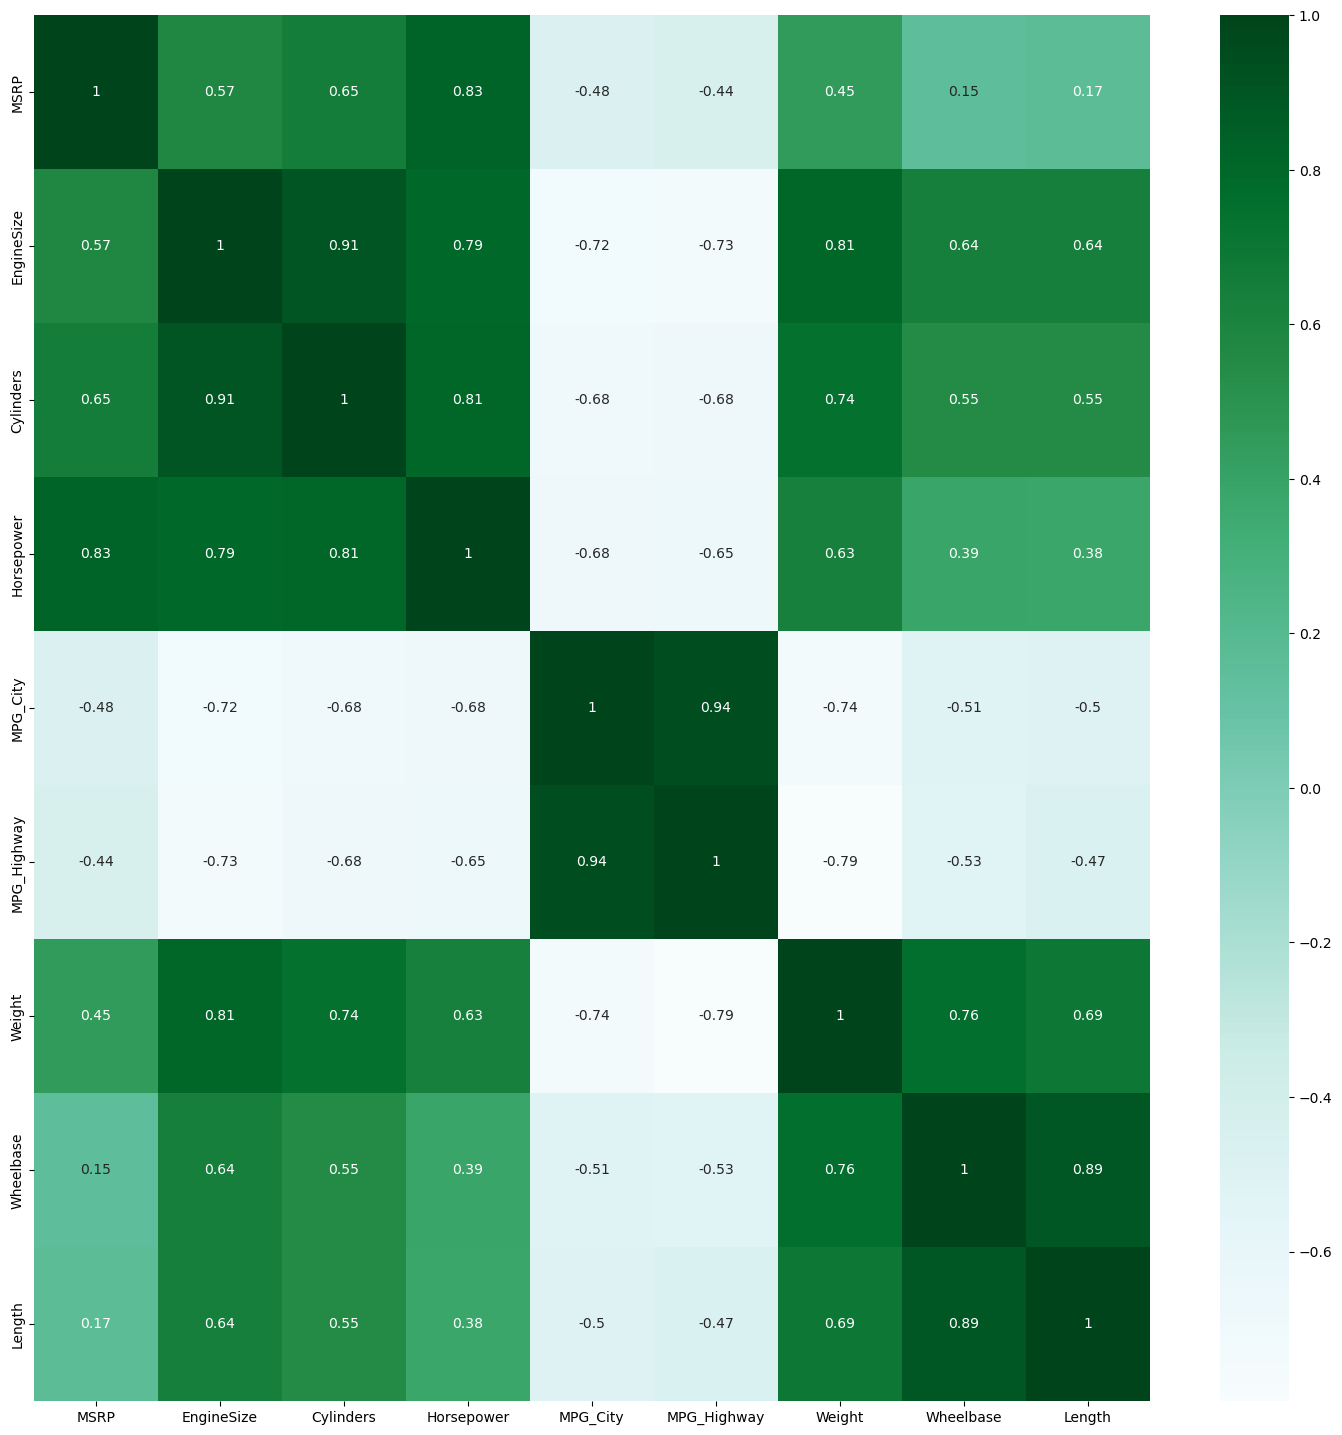

In [18]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(), cmap='BuGn', annot=True)

# One hot encoding(dummy variable)

In [19]:
data.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP             int32
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [20]:
data.columns

Index(['Make', 'Model', 'Type', 'Origin', 'DriveTrain', 'MSRP', 'EngineSize',
       'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight',
       'Wheelbase', 'Length'],
      dtype='object')

In [21]:
data = pd.get_dummies(data, columns=['Make','Model','Type','Origin','DriveTrain'])
data.head()
data.shape

(426, 482)

# Separating data as Dependent/Independent

In [22]:
y = data['MSRP'] #dependent variable
x = data.drop('MSRP', axis=1) #independent variable

In [23]:
# We convert it to a numpy array to improve performance in data processing and scientific computing, optimize code and work more
# effectively with different data types.
x = np.array(x)
y = np.array(y)

# Preparation for the machine learning phase


In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Machine learning and Model Performance

In [25]:
# linear regression
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)
linear_regression.score(x_test, y_test)

0.8015824047662583

In [26]:
# Decision Tree Regression
tree_regression = DecisionTreeRegressor()
tree_regression.fit(x_train, y_train)
tree_regression.score(x_test, y_test)

0.07667702604672977

In [27]:
# Random Regression
random_regression = RandomForestRegressor()
random_regression.fit(x_train, y_train)
random_regression.score(x_test, y_test)

0.6514700925093365

In [28]:
# XGB Regression
xgb_regression = XGBRegressor()
xgb_regression.fit(x_train, y_train)
xgb_regression.score(x_test, y_test)

0.43348806696390907